In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [332]:
df=pd.read_csv("Flight.csv")

In [257]:
df.head()

,Unnamed: 0,Flight-Name,Date,Source,Destination,Departure Time,Arrival Time,Duration,Stops,Fare
0,0,Air Asia,"Wed, 20 Oct",New Delhi,Mumbai,18:40,06:20\n+ 1 day,11h 40m,1 Stop,"5,953"
1,1,Go First,"Wed, 20 Oct",New Delhi,Mumbai,18:50,20:45,1h 55m,Non Stop,"5,954"
2,2,Go First,"Wed, 20 Oct",New Delhi,Mumbai,20:30,22:35,2h 05m,Non Stop,"5,954"
3,3,Go First,"Wed, 20 Oct",New Delhi,Mumbai,21:30,23:35,2h 05m,Non Stop,"5,954"
4,4,Go First,"Wed, 20 Oct",New Delhi,Mumbai,22:45,01:00\n+ 1 day,2h 15m,Non Stop,"5,954"


## EDA

In [258]:
df.shape

(1539, 10)

There are 1539 rows and 10 columns in our dataset.

In [259]:
df.dtypes

Unnamed: 0         int64
Flight-Name       object
Date              object
Source            object
Destination       object
Departure Time    object
Arrival Time      object
Duration          object
Stops             object
Fare              object
dtype: object

All the columns are object type

In [260]:
#Unique values in each columns
for i in df.columns:
    print(i , df[i].nunique())

Unnamed: 0 1539
Flight-Name 6
Date 13
Source 3
Destination 3
Departure Time 211
Arrival Time 263
Duration 293
Stops 5
Fare 667


In [261]:
#checling for null values
df.isnull().sum()

Unnamed: 0        0
Flight-Name       0
Date              0
Source            0
Destination       0
Departure Time    0
Arrival Time      0
Duration          0
Stops             0
Fare              0
dtype: int64

There are no null values in our datatset.

In [262]:
#checking for dupllicate values
df.duplicated().sum()

0

There are no duplicates

In [337]:
df.describe(include = 'object')

,Flight-Name,Date,Source,Destination,Departure Time,Arrival Time,Duration,Stops,Fare
count,1539,1539,1539,1539,1539,1539,1539,1539,1539
unique,6,13,3,3,211,263,293,5,667
top,IndiGo,"Fri, 19 Nov",Mumbai,Mumbai,19:00,12:55\n+ 1 day,2h 10m,1 Stop,"5,955"
freq,447,245,691,535,34,39,65,1009,57


## Feature Engineering:

#### Converting duration in minutes:

In [263]:
df= df.join(df['Duration'].str.split(' ', 1, expand=True).rename(columns={0:'hour', 1:'minute'}))

In [264]:
df['hour']=df['hour'].str.replace("h", '*60').apply(eval)

In [265]:
df['minute']=df['minute'].str.replace("m", '')

In [266]:
df['minute']=df['minute'].astype(int)

In [267]:
df.drop('Duration',axis=1,inplace=True)

In [268]:
df['Duration'] = (df['hour'] + df['minute'])

In [269]:
df.drop(['hour','minute'],axis=1,inplace=True)

In [271]:
#Date of Journey in train data
df["Journey_day"] = df['Date'].str.split(' ').str[1].astype(int)
df["Journey_month"] = df['Date'].str.split(' ').str[2]
df.drop(["Date"], axis = 1, inplace = True)

In [273]:
#Departure Time in train data
df["Departure_Hour"] = pd.to_datetime(df["Departure Time"]).dt.hour
df["Departure_Min"] = pd.to_datetime(df["Departure Time"]).dt.minute
df.drop(["Departure Time"], axis = 1, inplace = True)

In [275]:
#Arrival Time in train data
df["Arrival Time"] = df["Arrival Time"].str.split("+").str[0]
df["Arrival_hour"] = pd.to_datetime(df["Arrival Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival Time"]).dt.minute
df.drop(["Arrival Time"], axis = 1, inplace = True)

### Visualization

Text(0, 0.5, 'Count of flights')

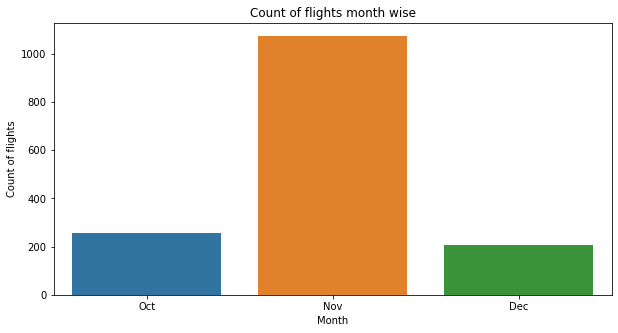

In [277]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

Highest number of flights are in November month.

In [278]:
df["Flight-Name"].value_counts()

IndiGo       447
Air India    407
Vistara      299
Go First     206
Air Asia     131
SpiceJet      49
Name: Flight-Name, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Go First'),
  Text(2, 0, 'SpiceJet'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Vistara'),
  Text(5, 0, 'Air India')])

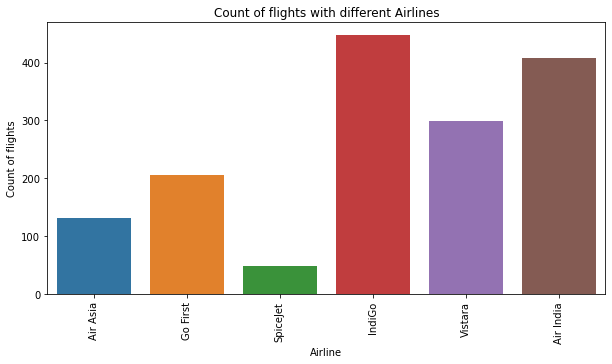

In [279]:
plt.figure(figsize = (10,5))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Flight-Name', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation=90)

Indigo and Air India have the highest number of flights while Air asia and Spicejet being the lowest.

In [282]:
#Removing the comma in Fare and coverting it to integer
df['Fare']=df['Fare'].str.replace(",","")

In [284]:
df['Fare']=df['Fare'].astype(int)

Text(0, 0.5, 'Price of ticket')

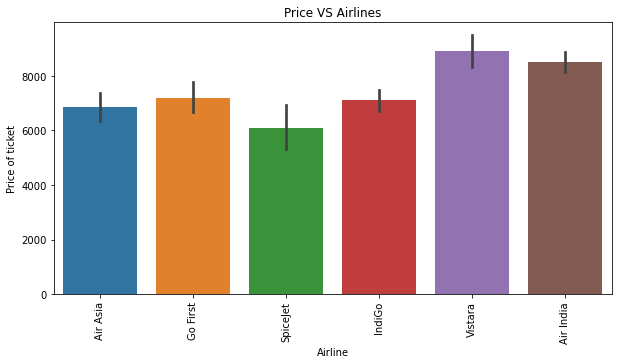

In [227]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Airlines')
sns.barplot(x='Flight-Name',y='Fare',data=df)
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')

Fare of Vistara is the highest, followed by Air India and lowest being Spicejet.

In [285]:
df["Stops"].value_counts()

1 Stop       1009
Non Stop      305
2 Stop(s)     188
3 Stop(s)      34
4 Stop(s)       3
Name: Stops, dtype: int64

In [286]:
#Encoding values of Stops column
df['Stops'].replace({'1 Stop':1,'Non Stop':0,'2 Stop(s)':2,'3 Stop(s)':3,'4 Stop(s)':4},inplace=True)

Text(0, 0.5, 'Price of ticket')

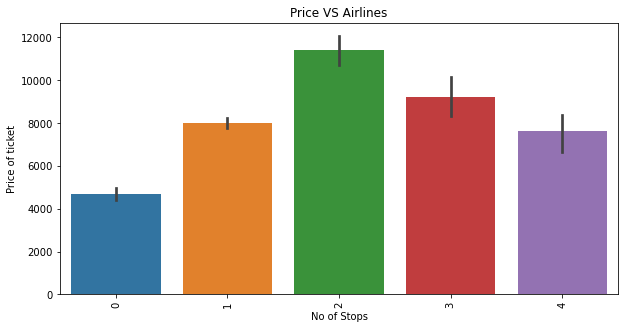

In [287]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Airlines')
sns.barplot(x='Stops',y='Fare',data=df)
plt.xticks(rotation = 90)
plt.xlabel('No of Stops')
plt.ylabel('Price of ticket')

Flights having 2 stops have more fare than 3 and 4 stops. Reason can be people won't prefer such long duration flights.

<AxesSubplot:xlabel='Duration', ylabel='Fare'>

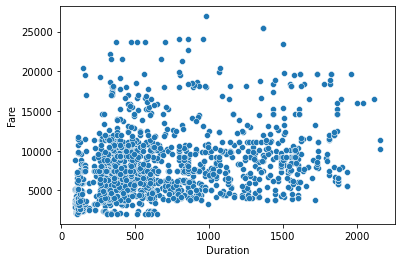

In [253]:
sns.scatterplot(x='Duration',y='Fare',data=df)

Flights with either very less duration or very large duration have least fare.

Text(0, 0.5, 'Price of ticket')

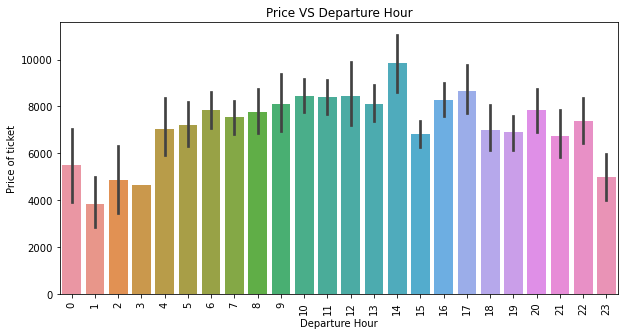

In [288]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Departure Hour')
sns.barplot(x='Departure_Hour',y='Fare',data=df)
plt.xticks(rotation = 90)
plt.xlabel('Departure Hour')
plt.ylabel('Price of ticket')

Looking at the plot, we can say flights in the midnight and early mornings are the cheapest

Text(0, 0.5, 'Price of ticket')

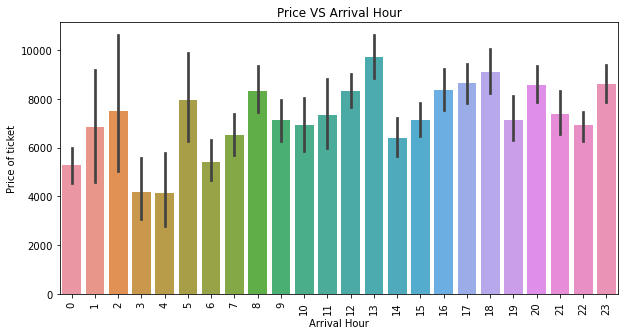

In [289]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Arrival Hour')
sns.barplot(x='Arrival_hour',y='Fare',data=df)
plt.xticks(rotation = 90)
plt.xlabel('Arrival Hour')
plt.ylabel('Price of ticket')

Flights arriving in late mornings and afternoon are comparatively expensive.

In [290]:
#Performing Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Flight-Name']=le.fit_transform(df['Flight-Name'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Journey_month']=le.fit_transform(df['Journey_month'])

In [319]:
#Separating x and y for model evaluation
x=df.drop(['Fare','Unnamed: 0','Source','Destination'],axis=1)
y=df[['Fare']]

In [321]:
#lets bring all features to a common scale
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_=ss.fit_transform(x)
x_=pd.DataFrame(x_,columns=x.columns)
x_

,Flight-Name,Stops,Duration,Journey_day,Journey_month,Departure_Hour,Departure_Min,Arrival_hour,Arrival_min
0,-1.576597,0.039841,0.088742,0.259715,1.762170,0.951087,0.783132,-1.499799,-0.384348
1,-0.316466,-1.493052,-1.097277,0.259715,1.762170,0.951087,1.329230,0.872616,0.997044
2,-0.316466,-1.493052,-1.077003,0.259715,1.762170,1.315288,0.237033,1.211533,0.444487
3,-0.316466,-1.493052,-1.077003,0.259715,1.762170,1.497388,0.237033,1.380991,0.444487
4,-0.316466,-1.493052,-1.056729,0.259715,1.762170,1.679489,1.056181,-2.347090,-1.489462
...,...,...,...,...,...,...,...,...,...
1534,-0.946531,1.572734,0.778053,-2.000614,-1.882964,0.586886,-1.401263,-0.991424,-0.384348
1535,-0.946531,1.572734,1.507911,-2.000614,-1.882964,-0.505716,-1.401263,-0.991424,-0.384348
1536,-0.316466,0.039841,0.078606,-2.000614,-1.882964,1.497388,-1.401263,-1.160883,0.444487
1537,-0.316466,0.039841,0.119153,-2.000614,-1.882964,1.679489,1.329230,-0.821966,0.997044


## Model Evaluation

In [322]:
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 

In [324]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size = 0.2, random_state = 42)

In [325]:
model=[DecisionTreeRegressor(),SVR(), KNeighborsRegressor(),RandomForestRegressor(),LinearRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(m.score(x_train,y_train))
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

DecisionTreeRegressor()
0.9998161567147823
error: 
Mean absolute error:  1552.2992424242423
Mean squared error:  9392058.456800144
Root mean squared error:  3064.6465467978755
r2_score 0.487441984688499



SVR()
-0.049018598536997304
error: 
Mean absolute error:  3181.426234423374
Mean squared error:  19282125.904766683
Root mean squared error:  4391.141754118931
r2_score -0.05229415151030481



KNeighborsRegressor()
0.729401069734158
error: 
Mean absolute error:  1828.3597402597404
Mean squared error:  7940345.902077923
Root mean squared error:  2817.861938079636
r2_score 0.5666670991055062



RandomForestRegressor()
0.9632250351443612
error: 
Mean absolute error:  1443.41003785302
Mean squared error:  6289552.275674337
Root mean squared error:  2507.8979795187715
r2_score 0.6567567752643757



LinearRegression()
0.37637627148035446
error: 
Mean absolute error:  2410.1205230006485
Mean squared error:  11294217.381213505
Root mean squared error:  3360.687040057956
r2_score 0.3836344107

In [326]:
from xgboost import XGBRegressor
m=XGBRegressor()
m.fit(x_train,y_train)
m.score(x_train,y_train)
predm=m.predict(x_test)
print(m)
print(m.score(x_train,y_train))
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predm))
print("Mean squared error: ",mean_squared_error(y_test,predm))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
print("r2_score",r2_score(y_test,predm))
print("\n\n")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.9948869945084359
error: 
Mean absolute error:  1439.5827890371347
Mean squared error:  6137724.859718233
Root mean squared error:  2477.443210190343
r2_score 0.6650425370438917





Looking at the difference between accuracy and r2_score, xgboost and random forest are performing better than other algorithms. We will further perform hyperparameter tuning on them and find out the best parameters.

## Hyper Parameter Tuning

In [330]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0],"min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}
xg=XGBRegressor()
clf=RandomizedSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'reg_lambda': 1.0, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}


In [248]:
xg=XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=500,min_child_weight=1,gamma=0.0,colsample_bytree=0.7,reg_lambda=0.001)
xg.fit(x_train,y_train)
xg.score(x_train,y_train)
pred_xg=xg.predict(x_test)
xgs=r2_score(y_test,pred_xg)
print('R2 Score:',xgs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_xg))
print("Mean squared error: ",mean_squared_error(y_test,pred_xg))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_xg)))
xgscore=cross_val_score(xg,X,y,cv=5)
xgc=xgscore.mean()
print('Cross val score:',xgc*100)

R2 Score: 85.07492321014499
error: 
Mean absolute error:  797.0295838195008
Mean squared error:  2430286.7808834105
Root mean squared error:  1558.9377091094468
Cross val score: -47.02053128918803


In [249]:
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'n_estimators':[100,500],'max_depth': [4,5,6,7,8]}
rf=RandomForestRegressor()
clf=RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'mae'}


In [250]:
rf=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=500,max_depth=7)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_decision))
print("Mean squared error: ",mean_squared_error(y_test,pred_decision))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decision)))
rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

R2 Score: 75.35758259913065
error: 
Mean absolute error:  1235.7325238095239
Mean squared error:  4012585.134506758
Root mean squared error:  2003.143812737058
Cross val score: -50.5462417568458


XGBRegressor is performing best after hyperparameter tuning as it has better r2_score and MSE nd mAE.

## Saving the model

In [331]:
import joblib
joblib.dump(xg,'Flightprice.obj')

['Flightprice.obj']